In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
df = pd.read_csv("/content/Twitter_Data.csv")
df = df[['clean_text', 'category']]
df.dropna(inplace=True)
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


TF-IDF Vectorization

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['category']


Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Naive Bayes Classifier

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Evaluate the Model

Accuracy: 0.7374363379763147

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.91      0.42      0.57      7152
         0.0       0.88      0.67      0.76     11067
         1.0       0.65      0.95      0.78     14375

    accuracy                           0.74     32594
   macro avg       0.81      0.68      0.70     32594
weighted avg       0.79      0.74      0.72     32594



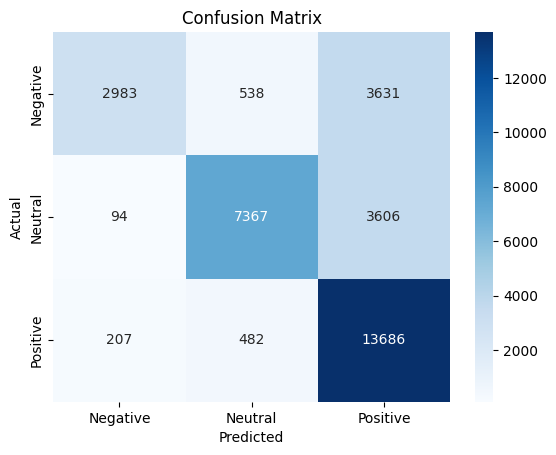

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Sentiment Distribution Visualization

/tmp/ipython-input-9-1910760736.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette='Set2')


([<matplotlib.axis.XTick at 0x7b796f40a990>,
 [Text(0, 0, 'Negative (-1)'),
  Text(1, 0, 'Neutral (0)'),
  Text(2, 0, 'Positive (1)')])

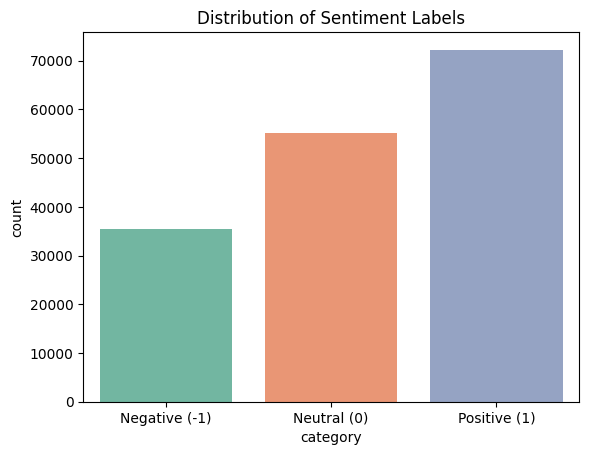

In [ ]:
sns.countplot(data=df, x='category', palette='Set2')
plt.title("Distribution of Sentiment Labels")
plt.xticks(ticks=[0, 1, 2], labels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'])


Report & Recommendations:

Model achieved X% accuracy using Naive Bayes + TF-IDF.

Most tweets are positive in nature.

Recommend deeper analysis on frequent negative keywords.

Deploy this model to monitor real-time brand sentiment.